# Initialization

In [1]:
from pulp import *
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
data1 = pd.read_csv("HW1_2022402309_case_1.txt", delimiter="t", header=None)
data1 = data1.rename(columns={0: 'X'})
data1[['X', 'Y']] = data1['X'].str.split(',', expand=True)
data1 = data1.assign(X = pd.to_numeric(data1['X']))
data1 = data1.assign(Y = pd.to_numeric(data1['Y']))
data1

,X,Y
0,376.461512,190.118443
1,389.144696,178.561591
2,397.788418,125.345081
3,341.630921,197.564288
4,342.757875,73.077869
...,...,...
95,121.351406,263.392055
96,172.711945,252.996324
97,249.848272,199.647487
98,277.592958,227.765790


In [3]:
data2 = pd.read_csv("HW1_2022402309_case_2.txt", delimiter="t", header=None)
data2 = data2.rename(columns={0: 'X'})
data2[['X', 'Y']] = data2['X'].str.split(',', expand=True)
data2 = data2.assign(X = pd.to_numeric(data2['X']))
data2 = data2.assign(Y = pd.to_numeric(data2['Y']))
data2

,X,Y
0,22.263268,643.211581
1,0.000000,697.201572
2,0.000000,667.402300
3,41.873061,738.509062
4,0.000000,687.327184
...,...,...
995,619.309195,858.182029
996,643.132194,858.948578
997,607.713175,825.621622
998,655.159829,886.931419


In [4]:
data3 = pd.read_csv("HW1_2022402309_case_3.txt", delimiter="t", header=None)
data3 = data3.rename(columns={0: 'X'})
data3[['X', 'Y']] = data3['X'].str.split(',', expand=True)
data3 = data3.assign(X = pd.to_numeric(data3['X']))
data3 = data3.assign(Y = pd.to_numeric(data3['Y']))
data3

,X,Y
0,161.760458,683.112481
1,163.674152,650.343896
2,99.177889,725.862230
3,106.601464,685.261515
4,150.245240,713.234259
...,...,...
9995,504.707030,910.009814
9996,487.295782,965.647345
9997,442.321243,909.369717
9998,480.472115,932.558777


In [5]:
# This function creates a list starting from 1 until the length of the customers
def create_customer_list(data):
    return list(range(1,len(data) + 1))

In [6]:
#This function creates a coordinate list
def create_coordinate_list():
    return ["X","Y"]

In [7]:
# This function creates a dictionary with two keys (X,Y). The values for each key is another dictionary showing the customer
# number as key and the coordinates as value

def create_coord_dictionary(data):
    X_coord = {}
    Y_coord = {}

    for i in range(1, len(data) + 1):
        X_coord[i] = data["X"][i-1]

    for i in range(1, len(data) + 1):
        Y_coord[i] = data["Y"][i-1]

    coord_dictionary = {'X' : X_coord,
                       'Y' : Y_coord}
    return coord_dictionary

In [8]:
# This function returns the optimal X and Y locations for the factory

def dec_var_optimal_values(problem):
    
    for v in problem.variables():
        if v.name == "Factory_coordinates_X":
            factory_x = v.varValue
        if v.name == "Factory_coordinates_Y":
            factory_y = v.varValue
            
    return factory_x, factory_y

In [9]:
# This function is to plot the 2D mapping.

def plot_map(x_factory, y_factory, x_customer, y_customer):
    
    plt.scatter(x_customer, y_customer, color='blue', label='Customer Points')
    plt.scatter(x_factory, y_factory, color='red', label='Optimal Point')
    plt.title('Facility Location Problem')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Task 1

## Case 1

Execution time: 0.05349397659301758
Solution Status for Case 1 Task 1 = : optimal
Factory X:  454.1977328494569
Factory Y:  260.0425228139663
Optimal objective value for case 1:  44875.93550266956


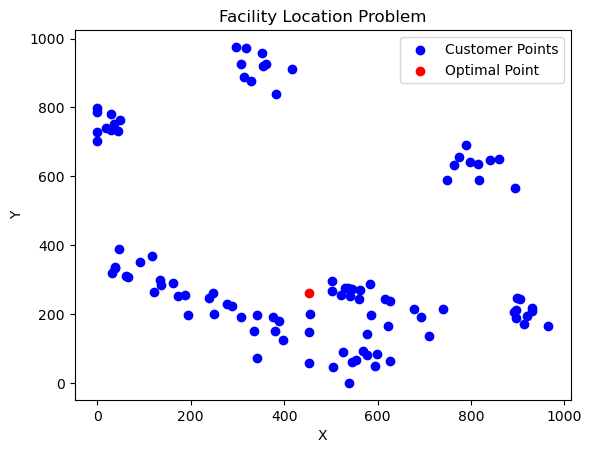

In [10]:
# Setting the decision variables
case1_task1_factory_x = cp.Variable()
case1_task1_factory_y = cp.Variable()

# Setting the objective function
abs_distance = 0

for i in range(len(data1)):
    abs_distance += cp.abs(case1_task1_factory_x - data1["X"][i])
    abs_distance += cp.abs(case1_task1_factory_y - data1["Y"][i])


obj_case1_task1 = cp.Minimize(abs_distance)

# Form the problem
case1_task1 = cp.Problem(obj_case1_task1)

# Solve the problem and measure time
start_case1_task1 = time.time()

case1_task1.solve(solver="ECOS")

end_case1_task1 = time.time()
time_case1_task1 = end_case1_task1 - start_case1_task1

print("Execution time:", time_case1_task1)

# Is the solution optimal or infeasible?
print(f"Solution Status for Case 1 Task 1 = : {case1_task1.status}")

# Decision variable optimal values for the problem
case1_task1_factory_x = case1_task1_factory_x.value
case1_task1_factory_y = case1_task1_factory_y.value

print("Factory X: ", case1_task1_factory_x)
print("Factory Y: ", case1_task1_factory_y)

# Optimal objective value for the problem
case1_task1_Z = case1_task1.value
print("Optimal objective value for case 1: ", case1_task1_Z)

# Plot
plot_map(case1_task1_factory_x,case1_task1_factory_y, data1["X"], data1["Y"])

## Case 2

/Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Execution time: 0.762531042098999
Solution Status for Case 2 Task 1 = : optimal
Factory X:  581.1338808521517
Factory Y:  677.2801827766896
Optimal objective value for case 2:  418900.04044512665


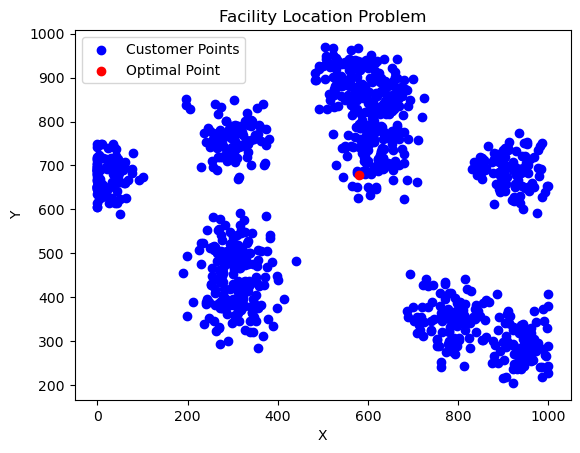

In [11]:
# Setting the decision variables
case2_task1_factory_x = cp.Variable()
case2_task1_factory_y = cp.Variable()

# Setting the objective function
abs_distance = 0

for i in range(len(data2)):
    abs_distance += cp.abs(case2_task1_factory_x - data2["X"][i])
    abs_distance += cp.abs(case2_task1_factory_y - data2["Y"][i])

obj_case2_task1 = cp.Minimize(abs_distance)

# Form the problem
case2_task1 = cp.Problem(obj_case2_task1)

# Solve the problem and measure time
start_case2_task1 = time.time()

case2_task1.solve(solver="ECOS")

end_case2_task1 = time.time()
time_case2_task1 = end_case2_task1 - start_case2_task1

print("Execution time:", time_case2_task1)

# Is the solution optimal or infeasible?
print(f"Solution Status for Case 2 Task 1 = : {case2_task1.status}")

# Decision variable optimal values for the problem
case2_task1_factory_x = case2_task1_factory_x.value
case2_task1_factory_y = case2_task1_factory_y.value

print("Factory X: ", case2_task1_factory_x)
print("Factory Y: ", case2_task1_factory_y)

# Optimal objective value for the problem
case2_task1_Z = case2_task1.value
print("Optimal objective value for case 2: ", case2_task1_Z)

# Plot
plot_map(case2_task1_factory_x,case2_task1_factory_y, data2["X"], data2["Y"])

## Case 3

Execution time: 21.207287073135376
Solution Status for Case 3 Task 1 = : optimal
Factory X:  494.1133509235845
Factory Y:  671.0350736098421
Optimal objective value for case 3:  3183668.774928629


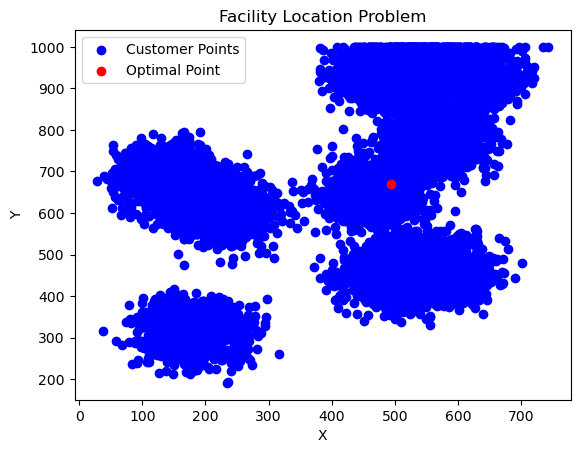

In [12]:
# Setting the decision variables
case3_task1_factory_x = cp.Variable()
case3_task1_factory_y = cp.Variable()

# Setting the objective function
abs_distance = 0

for i in range(len(data3)):
    abs_distance += cp.abs(case3_task1_factory_x - data3["X"][i])
    abs_distance += cp.abs(case3_task1_factory_y - data3["Y"][i])

obj_case3_task1 = cp.Minimize(abs_distance)

# Form the problem
case3_task1 = cp.Problem(obj_case3_task1)

# Solve the problem and measure time
start_case3_task1 = time.time()

case3_task1.solve(solver="ECOS")

end_case3_task1 = time.time()
time_case3_task1 = end_case3_task1 - start_case3_task1

print("Execution time:", time_case3_task1)

# Is the solution optimal or infeasible?
print(f"Solution Status for Case 3 Task 1 = : {case3_task1.status}")

# Decision variable optimal values for the problem
case3_task1_factory_x = case3_task1_factory_x.value
case3_task1_factory_y = case3_task1_factory_y.value

print("Factory X: ", case3_task1_factory_x)
print("Factory Y: ", case3_task1_factory_y)

# Optimal objective value for the problem
case3_task1_Z = case3_task1.value
print("Optimal objective value for case 3: ", case3_task1_Z)

# Plot
plot_map(case3_task1_factory_x,case3_task1_factory_y, data3["X"], data3["Y"])

# Task 2

## Case 1

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/89d896880ce9477da57a537b06ea8e6f-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/89d896880ce9477da57a537b06ea8e6f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 405 COLUMNS
At line 1406 RHS
At line 1807 BOUNDS
At line 2010 ENDATA
Problem MODEL has 400 rows, 202 columns and 800 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 400 (0) rows, 202 (0) columns and 800 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 0 ( 0%) - largest zero change 0
0  Obj 0 Primal inf 82412.671 (195) Dual inf 1.99998 (200) w.o. free dual inf (0)
83  Obj -1e+10 Primal inf 2.0099999e+12 (159) Dual inf 1.1699883 

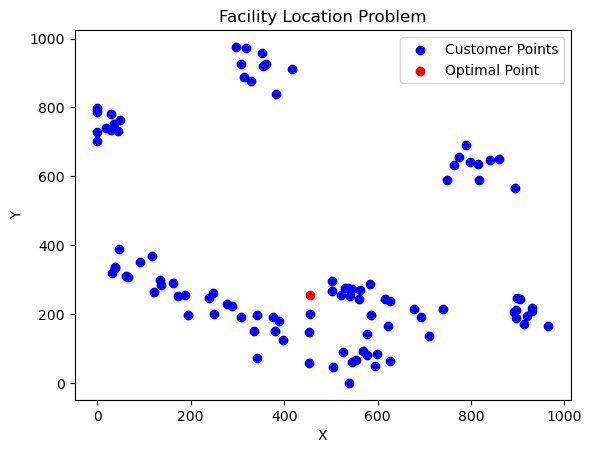

In [13]:
# Lists for customers and the coordinates
case1_customers = create_customer_list(data1)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case1 = create_coord_dictionary(data1)

# Setting up the problem 
case1_task2 = LpProblem("Facility_Location_Problem_Case_1_Task_2", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
Z_dec_vars_case_1_task2 = LpVariable.dicts("Distance", [(i,j) for i in case1_customers for j in coordinates])

# Setting the objective function
case1_task2 += lpSum(Z_dec_vars_case_1_task2[(i,j)] for i in case1_customers for j in coordinates)

# Constraints
for i in case1_customers:
    for j in coordinates:
        case1_task2 += (Z_dec_vars_case_1_task2[(i,j)] >= Factory_coordinates[j] - coord_dictionary_case1[j][i])
        case1_task2 += (Z_dec_vars_case_1_task2[(i,j)] >= - Factory_coordinates[j] + coord_dictionary_case1[j][i])

# Solve the problem and measure time
start_case1_task2 = time.time()

case1_task2.solve()
    
end_case1_task2 = time.time()
time_case1_task2 = end_case1_task2 - start_case1_task2

print("Execution time:", time_case1_task2)

# Is the solution optimal or infeasible?
print("Solution Status for Case 1 Task 2 = ", LpStatus[case1_task2.status])

# Decision variable optimal values for the problem
(case1_task2_factory_x, case1_task2_factory_y) = dec_var_optimal_values(case1_task2)
print("Factory X: ", case1_task2_factory_x)
print("Factory Y: ", case1_task2_factory_y)

# Optimal objective value for the problem
case1_task2_Z = pulp.value(case1_task2.objective)
print("Optimal objective value for case 1: ", case1_task2_Z)

# Plot
plot_map(case1_task2_factory_x,case1_task2_factory_y, data1["X"], data1["Y"])

## Case 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/06f681db3a334fd6bb8501baa904d9b0-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/06f681db3a334fd6bb8501baa904d9b0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 4005 COLUMNS
At line 14006 RHS
At line 18007 BOUNDS
At line 20010 ENDATA
Problem MODEL has 4000 rows, 2002 columns and 8000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4000 (0) rows, 2002 (0) columns and 8000 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 0 ( 0%) - largest zero change 0
0  Obj 0 Primal inf 1150472 (1962) Dual inf 19.9998 (2000) w.o. free dual inf (0)
155  Obj -9.9999993e+09 Primal inf 2.0009999e+13 (1923)

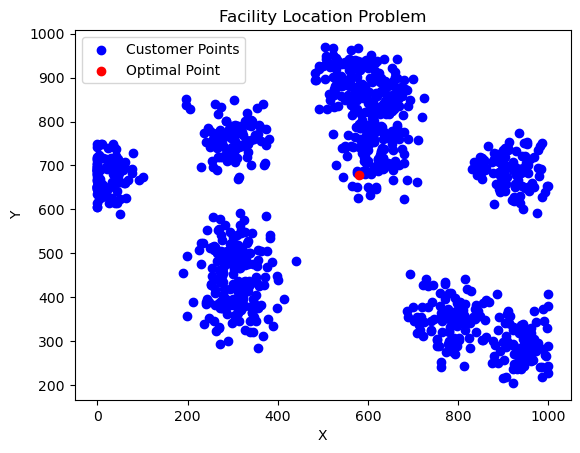

In [14]:
# Lists for customers and the coordinates
case2_customers = create_customer_list(data2)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case2 = create_coord_dictionary(data2)

# Setting up the problem
case2_task2 = LpProblem("Facility_Location_Problem_Case_2_Task_2", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
Z_dec_vars_case_2_task2 = LpVariable.dicts("Distance", [(i,j) for i in case2_customers for j in coordinates])

# Setting the objective function
case2_task2 += lpSum(Z_dec_vars_case_2_task2[(i,j)] for i in case2_customers for j in coordinates)

# Constraints
for i in case2_customers:
    for j in coordinates:
        case2_task2 += (Z_dec_vars_case_2_task2[(i,j)] >= Factory_coordinates[j] - coord_dictionary_case2[j][i])
        case2_task2 += (Z_dec_vars_case_2_task2[(i,j)] >= - Factory_coordinates[j] + coord_dictionary_case2[j][i])

# Solve the problems and measure time
start_case2_task2 = time.time()

case2_task2.solve()
    
end_case2_task2 = time.time()
time_case2_task2 = end_case2_task2 - start_case2_task2

print("Execution time:", time_case2_task2)

# Is the solution optimal or infeasible?
print("Solution Status for Case 2 Task 2 = ", LpStatus[case2_task2.status])

# Decision variable optimal values for the problem
(case2_task2_factory_x, case2_task2_factory_y) = dec_var_optimal_values(case2_task2)
print("Factory X: ", case2_task2_factory_x)
print("Factory Y: ", case2_task2_factory_y)

# Optimal objective value for the problem
case2_task2_Z = pulp.value(case2_task2.objective)
print("Optimal objective value for case 2: ", case2_task2_Z)

# Plot
plot_map(case2_task2_factory_x,case2_task2_factory_y, data2["X"], data2["Y"])

## Case 3

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/c29872274de64efca580ac8e32ef5065-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/c29872274de64efca580ac8e32ef5065-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 40005 COLUMNS
At line 140006 RHS
At line 180007 BOUNDS
At line 200010 ENDATA
Problem MODEL has 40000 rows, 20002 columns and 80000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 40000 (0) rows, 20002 (0) columns and 80000 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 0 ( 0%) - largest zero change 0
0  Obj 0 Primal inf 11063849 (20000) Dual inf 199.998 (20000) w.o. free dual inf (0)
425  Obj -9.9999986e+09 Primal inf 1.0001e

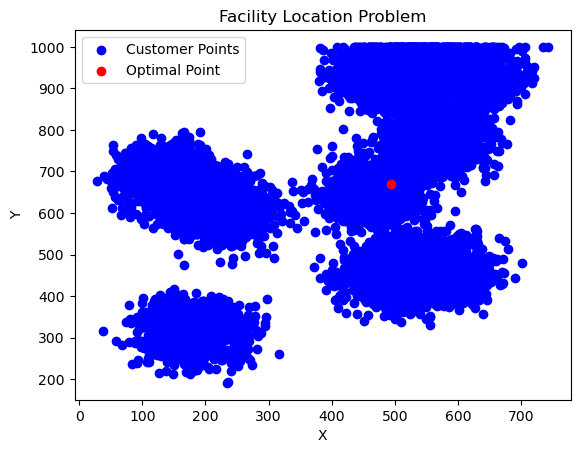

In [15]:
# Lists for customers and the coordinates
case3_customers = create_customer_list(data3)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case3 = create_coord_dictionary(data3)

# Setting up the problem
case3_task2 = LpProblem("Facility_Location_Problem_Case_3_Task_2", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
Z_dec_vars_case_3_task2 = LpVariable.dicts("Distance", [(i,j) for i in case3_customers for j in coordinates])

# Setting the objective function
case3_task2 += lpSum(Z_dec_vars_case_3_task2[(i,j)] for i in case3_customers for j in coordinates)

# Constraints
for i in case3_customers:
    for j in coordinates:
        case3_task2 += (Z_dec_vars_case_3_task2[(i,j)] >= Factory_coordinates[j] - coord_dictionary_case3[j][i])
        case3_task2 += (Z_dec_vars_case_3_task2[(i,j)] >= - Factory_coordinates[j] + coord_dictionary_case3[j][i])

# Solve the problems and measure time
start_case3_task2 = time.time()

case3_task2.solve()
    
end_case3_task2 = time.time()
time_case3_task2 = end_case3_task2 - start_case3_task2

print("Execution time:", time_case3_task2)

# Is the solution optimal or infeasible?
print("Solution Status for Case 3 Task 2 = ", LpStatus[case3_task2.status])

# Decision variable optimal values for the problem
(case3_task2_factory_x, case3_task2_factory_y) = dec_var_optimal_values(case3_task2)
print("Factory X: ", case3_task2_factory_x)
print("Factory Y: ", case3_task2_factory_y)

# Optimal objective value for the problem
case3_task2_Z = pulp.value(case3_task2.objective)
print("Optimal objective value for case 3: ", case3_task2_Z)

# Plot
plot_map(case3_task2_factory_x,case3_task2_factory_y, data3["X"], data3["Y"])

# Task 3

## Case 1

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/0780fbae7e2f48a092a1655e82effbc2-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/0780fbae7e2f48a092a1655e82effbc2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 205 COLUMNS
At line 1206 RHS
At line 1407 BOUNDS
At line 1410 ENDATA
Problem MODEL has 200 rows, 402 columns and 600 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 200 (0) rows, 402 (0) columns and 600 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 2.0964921e-07 ( 2.0964921e-05%) - largest zero change 0
0  Obj 0 Primal inf 82412.671 (195)
34  Obj 15221.831 Primal inf 60837.641 (166)
75  Obj 29398.659 Primal inf 44666.58 (125

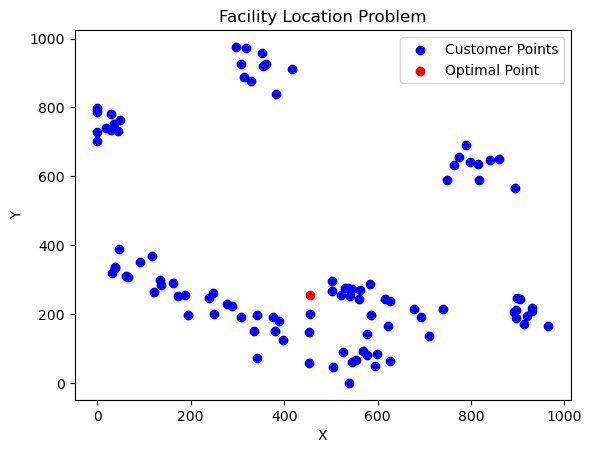

In [16]:
# Lists for customers and the coordinates
case1_customers = create_customer_list(data1)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case1 = create_coord_dictionary(data1)

# Setting up the problem
case1_task3 = LpProblem("Facility_Location_Problem_Case_1_Task_3", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
t_plus = LpVariable.dicts("Distance_X_plus", [(i,"X") for i in case1_customers],lowBound=0)
t_minus = LpVariable.dicts("Distance_X_minus", [(i,"X") for i in case1_customers],lowBound=0)
h_plus = LpVariable.dicts("Distance_Y_plus", [(i,"Y") for i in case1_customers],lowBound=0)
h_minus = LpVariable.dicts("Distance_Y_minus", [(i,"Y") for i in case1_customers],lowBound=0)

# Setting the objective function
case1_task3 += lpSum(i for i in list(t_plus.values())) + lpSum(i for i in list(t_minus.values())) + lpSum(i for i in list(h_plus.values())) + lpSum(i for i in list(h_minus.values()))


# Constraints
for i in case1_customers:
    case1_task3 += Factory_coordinates["X"] - coord_dictionary_case1["X"][i] == t_plus[(i,"X")] - t_minus[(i,"X")]
    case1_task3 += Factory_coordinates["Y"] - coord_dictionary_case1["Y"][i] == h_plus[(i,"Y")] - h_minus[(i,"Y")] 

# Solve the problems and measure time
start_case1_task3 = time.time()

case1_task3.solve()
    
end_case1_task3 = time.time()
time_case1_task3 = end_case1_task3 - start_case1_task3

print("Execution time:", time_case1_task3)

# Is the solution optimal or infeasible?
print("Solution Status for Case 1 Task 3 = ", LpStatus[case1_task3.status])

# Decision variable optimal values for the problem
(case1_task3_factory_x, case1_task3_factory_y) = dec_var_optimal_values(case1_task3)
print("Factory X: ", case1_task3_factory_x)
print("Factory Y: ", case1_task3_factory_y)

# Optimal objective value for the problem
case1_task3_Z = pulp.value(case1_task3.objective)
print("Optimal objective value for case 3: ", case1_task3_Z)

# Plot
plot_map(case1_task3_factory_x,case1_task3_factory_y, data1["X"], data1["Y"])

## Case 2

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/fa4f2a654d3547519897254c11e542e5-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/fa4f2a654d3547519897254c11e542e5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2005 COLUMNS
At line 12006 RHS
At line 14007 BOUNDS
At line 14010 ENDATA
Problem MODEL has 2000 rows, 4002 columns and 6000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2000 (0) rows, 4002 (0) columns and 6000 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 2.0996343e-07 ( 2.0996343e-05%) - largest zero change 0
0  Obj 0 Primal inf 1150472 (1962)
74  Obj 35401.85 Primal inf 859637.94 (1925)
147  Obj 69964.926 Primal inf 696

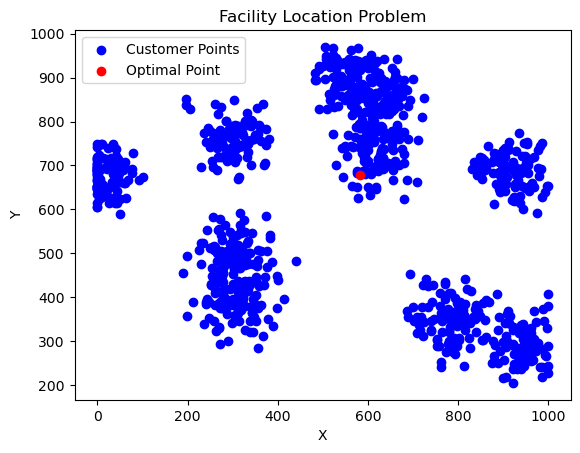

In [17]:
# Lists for customers and the coordinates
case2_customers = create_customer_list(data2)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case2 = create_coord_dictionary(data2)

# Setting up the problem
case2_task3 = LpProblem("Facility_Location_Problem_Case_2_Task_3", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
t_plus = LpVariable.dicts("Distance_X_plus", [(i,"X") for i in case2_customers],lowBound=0)
t_minus = LpVariable.dicts("Distance_X_minus", [(i,"X") for i in case2_customers],lowBound=0)
h_plus = LpVariable.dicts("Distance_Y_plus", [(i,"Y") for i in case2_customers],lowBound=0)
h_minus = LpVariable.dicts("Distance_Y_minus", [(i,"Y") for i in case2_customers],lowBound=0)

# Setting the objective function
case2_task3 += lpSum(i for i in list(t_plus.values())) + lpSum(i for i in list(t_minus.values())) + lpSum(i for i in list(h_plus.values())) + lpSum(i for i in list(h_minus.values()))


# Constraints
for i in case2_customers:
    case2_task3 += Factory_coordinates["X"] - coord_dictionary_case2["X"][i] == t_plus[(i,"X")] - t_minus[(i,"X")]
    case2_task3 += Factory_coordinates["Y"] - coord_dictionary_case2["Y"][i] == h_plus[(i,"Y")] - h_minus[(i,"Y")] 

# Solve the problems and measure time
start_case2_task3 = time.time()

case2_task3.solve()
    
end_case2_task3 = time.time()
time_case2_task3 = end_case2_task3 - start_case2_task3

print("Execution time:", time_case2_task3)

# Is the solution optimal or infeasible?
print("Solution Status for Case 2 Task 3 = ", LpStatus[case2_task3.status])

# Decision variable optimal values for the problem
(case2_task3_factory_x, case2_task3_factory_y) = dec_var_optimal_values(case2_task3)
print("Factory X: ", case2_task3_factory_x)
print("Factory Y: ", case2_task3_factory_y)

# Optimal objective value for the problem
case2_task3_Z = pulp.value(case2_task3.objective)
print("Optimal objective value for case 3: ", case2_task3_Z)

# Plot
plot_map(case2_task3_factory_x,case2_task3_factory_y, data2["X"], data2["Y"])

## Case 3

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ahmetkarakose/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/f3b5a792537a4d84a79eb0a8b3259e78-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/dd/51tkdh2n1m5f0w9z63tq8qfr0000gn/T/f3b5a792537a4d84a79eb0a8b3259e78-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 20005 COLUMNS
At line 120006 RHS
At line 140007 BOUNDS
At line 140010 ENDATA
Problem MODEL has 20000 rows, 40002 columns and 60000 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 20000 (0) rows, 40002 (0) columns and 60000 (0) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 2.0999879e-07 ( 2.0999879e-05%) - largest zero change 0
0  Obj 0 Primal inf 11063849 (20000)
295  Obj 83714.72 Primal inf 5823376 (19772)
579  Obj 156384.03 Pr

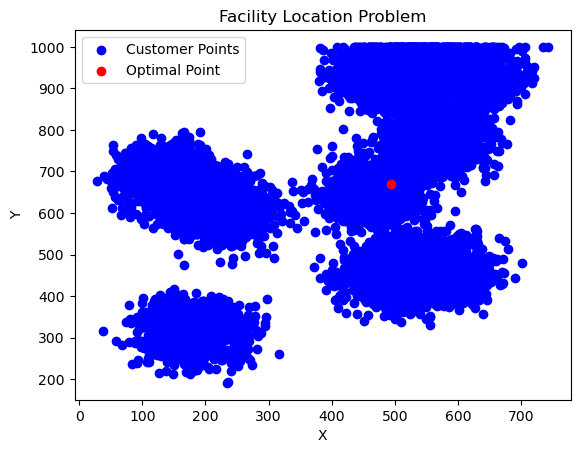

In [18]:
# Lists for customers and the coordinates
case3_customers = create_customer_list(data3)
coordinates = create_coordinate_list()

# Dictionary for coordinates
coord_dictionary_case3 = create_coord_dictionary(data3)

# Setting up the problem
case3_task3 = LpProblem("Facility_Location_Problem_Case_3_Task_3", LpMinimize)

# Setting the decision variables
Factory_coordinates = LpVariable.dicts("Factory_coordinates", ["X","Y"])
t_plus = LpVariable.dicts("Distance_X_plus", [(i,"X") for i in case3_customers],lowBound=0)
t_minus = LpVariable.dicts("Distance_X_minus", [(i,"X") for i in case3_customers],lowBound=0)
h_plus = LpVariable.dicts("Distance_Y_plus", [(i,"Y") for i in case3_customers],lowBound=0)
h_minus = LpVariable.dicts("Distance_Y_minus", [(i,"Y") for i in case3_customers],lowBound=0)

# Setting the objective function
case3_task3 += lpSum(i for i in list(t_plus.values())) + lpSum(i for i in list(t_minus.values())) + lpSum(i for i in list(h_plus.values())) + lpSum(i for i in list(h_minus.values()))


# Constraints
for i in case3_customers:
    case3_task3 += Factory_coordinates["X"] - coord_dictionary_case3["X"][i] == t_plus[(i,"X")] - t_minus[(i,"X")]
    case3_task3 += Factory_coordinates["Y"] - coord_dictionary_case3["Y"][i] == h_plus[(i,"Y")] - h_minus[(i,"Y")] 

# Solve the problems and measure time
start_case3_task3 = time.time()

case3_task3.solve()
    
end_case3_task3 = time.time()
time_case3_task3 = end_case3_task3 - start_case3_task3

print("Execution time:", time_case3_task3)

# Is the solution optimal or infeasible?
print("Solution Status for Case 3 Task 3 = ", LpStatus[case3_task3.status])

# Decision variable optimal values for the problem
(case3_task3_factory_x, case3_task3_factory_y) = dec_var_optimal_values(case3_task3)
print("Factory X: ", case3_task3_factory_x)
print("Factory Y: ", case3_task3_factory_y)

# Optimal objective value for the problem
case3_task3_Z = pulp.value(case3_task3.objective)
print("Optimal objective value for case 3: ", case3_task3_Z)

# Plot
plot_map(case3_task3_factory_x,case3_task3_factory_y, data3["X"], data3["Y"])

# Task 4

In [19]:
d1 = {'Z': [case1_task1_Z, case1_task2_Z, case1_task3_Z], "X": [case1_task1_factory_x,case1_task2_factory_x, case1_task3_factory_x], "Y": [case1_task1_factory_y, case1_task2_factory_y, case1_task3_factory_y], "Runtime in seconds": [time_case1_task1, time_case1_task2, time_case1_task3]}
d2 = {'Z': [case2_task1_Z, case2_task2_Z, case2_task3_Z], "X": [case2_task1_factory_x,case2_task2_factory_x,case2_task3_factory_x], "Y": [case2_task1_factory_y, case2_task2_factory_y, case2_task3_factory_y], "Runtime in seconds": [time_case2_task1, time_case2_task2, time_case2_task3]}
d3 = {'Z': [case3_task1_Z,case3_task2_Z, case3_task3_Z], "X": [case3_task1_factory_x,case3_task2_factory_x, case3_task3_factory_x], "Y": [case3_task1_factory_y, case3_task2_factory_y, case3_task3_factory_y], "Runtime in seconds": [time_case3_task1, time_case3_task2, time_case3_task3]}

case1 = pd.DataFrame(d1,index=["Task 1", "Task 2", "Task 3"])
case2 = pd.DataFrame(d2,index=["Task 1", "Task 2", "Task 3"])
case3 = pd.DataFrame(d3,index=["Task 1", "Task 2", "Task 3"])

In [20]:
print("n = 100")
case1

n = 100


,Z,X,Y,Runtime in seconds
Task 1,44875.935503,454.1977328494569,260.0425228139663,0.053494
Task 2,44875.935549,454.35302,256.71162,0.025452
Task 3,44875.935549,454.35302,256.71162,0.017242


In [21]:
print("n = 1000")
case2

n = 1000


,Z,X,Y,Runtime in seconds
Task 1,418900.040445,581.1338808521517,677.2801827766896,0.762531
Task 2,418900.040430,580.97016,677.15946,0.078312
Task 3,418900.040493,581.59751,677.52693,0.097331


In [22]:
print("n = 10000")
case3

n = 10000


,Z,X,Y,Runtime in seconds
Task 1,3.183669e+06,494.1133509235845,671.0350736098421,21.207287
Task 2,3.183669e+06,494.16289,670.98826,1.183014
Task 3,3.183669e+06,494.16289,670.98826,3.610259


# Task 5

- In task 1, we only have X and Y decision varibales.
- In task 1, there is no constraints.
- However it should be noted that task 1 is an NLP model

- In task 2, for each X coordinate, we need 1 Z decision variable. Also for each Y coordinate, we need 1 Z decision variable. Therefore for n (X,Y) coordinates we need 2n decision variables. Adding the X and Y decision variables makes it 2n+2 decision variables in total.
- In task 2 for each Z variable defined we need two constraints. This makes 2n*2 = 4n constraints.

- In task 3, for each X coordinate we need 1 t_plus and 1 t_minus decision variables. Also for each Y coordinate, we need 1 h_plus and 1 h_minus decision variables. Therefore for n (X,Y) coordinates we need 4n decision variables. Adding the X and Y decision variables makes it 4n+2 decision variables in total.
- In task 3 for each (X,Y) data points we need two equality constraints. This makes 2n constraints.

An important thing to notice is that even though the number of decision variables and constraints doesn't increase in Task 1, NLP model penalizes the increase in n the most. This is a multivariable unconstrained problem and it's most probably solved using heuristics. Therefore as the number of data points increases, the heuristic looks for more and more options and it makes it slower.

It's obvious that as the number of data points increases, decision variables for Task 2 and Task 3 are increasing by 2x and 4x respectively. When we compare their runtimes, as n increases runtime of Task 3 is increasing more rapidly. Therefore we can deduct that between LP formulations number of decision variables does have a bigger impact. Also the reason may be due to the conversion of the equality constraints to >= and <= constraints in Task 3 inside the package. If that is the case, number of constraints of Task 2 and Task 3 are the same and only the number of decision variables are increasing more rapidly in Task 3 then Task 2.

Another important aspect is that the objective value Z_star is slightly different in Task 1 when compared to Task 2 and Task 3. This is due to the tolerance limit (Epsilon) that is in the inputs of the NLP model.

Below, the chart for decision variables and constraints can be found

In [23]:

data = {'# Decision Variables': [2, 2, 2, 202, 2002, 20002, 402, 4002, 40002], " # Constraints": [0, 0, 0, 400, 4000, 40000, 200, 2000, 20000]}

df = pd.DataFrame(data,index=["Case 1 Task 1", "Case 2 Task 1", "Case 3 Task 1", "Case 1 Task 2", "Case 2 Task 2", "Case 3 Task 2", "Case 1 Task 3", "Case 2 Task 3", "Case 3 Task 3" ])
df

,# Decision Variables,# Constraints
Case 1 Task 1,2,0
Case 2 Task 1,2,0
Case 3 Task 1,2,0
Case 1 Task 2,202,400
Case 2 Task 2,2002,4000
Case 3 Task 2,20002,40000
Case 1 Task 3,402,200
Case 2 Task 3,4002,2000
Case 3 Task 3,40002,20000


# Task 6

All of the plots are plotted in corresponding tasks and cases. However below they are plotted again for convenience 

Case 1 Task 1 Map


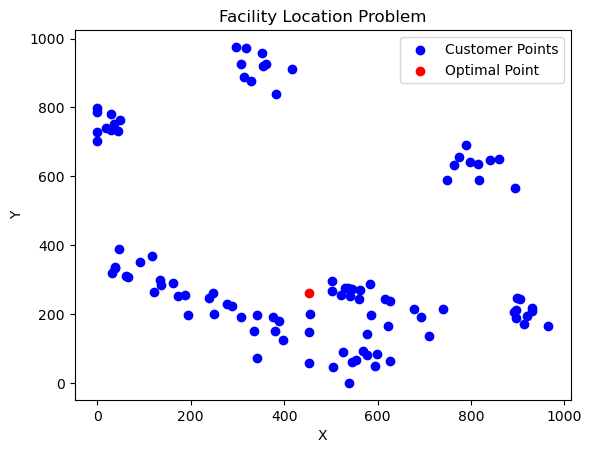

Case 2 Task 1 Map


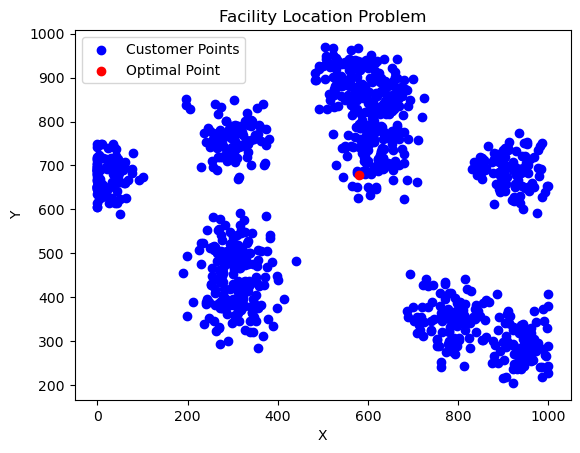

Case 3 Task 1 Map


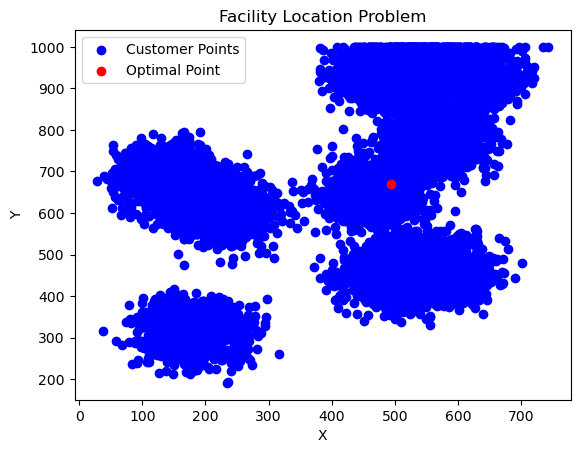

Case 1 Task 2 Map


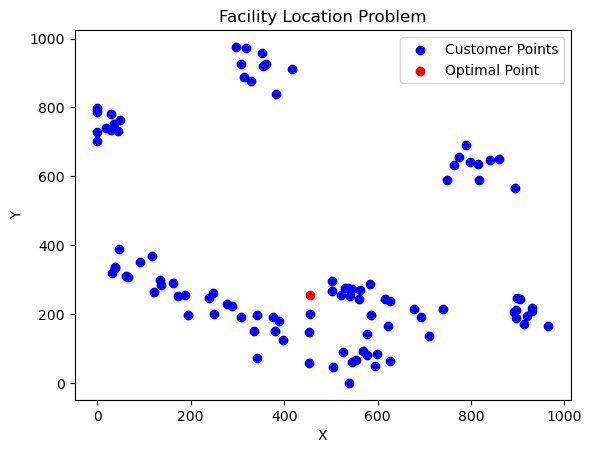

Case 2 Task 2 Map


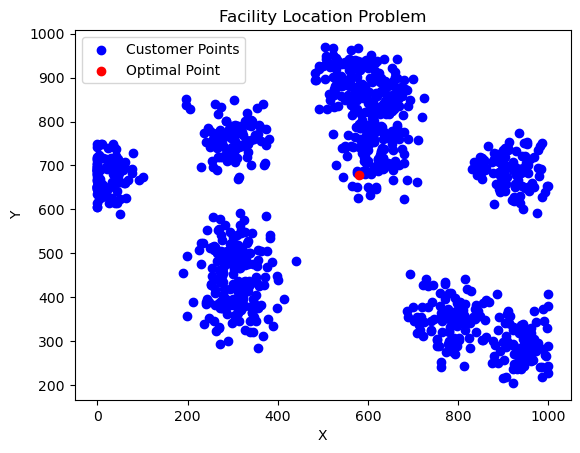

Case 3 Task 2 Map


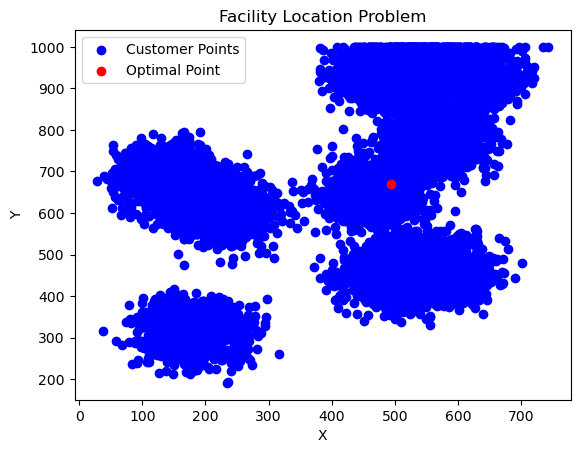

Case 1 Task 3 Map


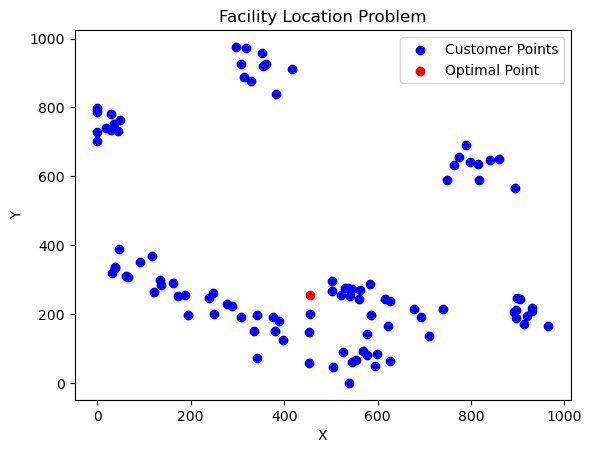

Case 2 Task 3 Map


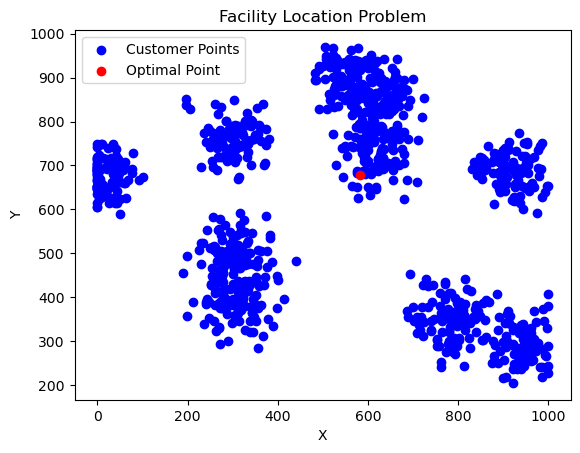

Case 3 Task 3 Map


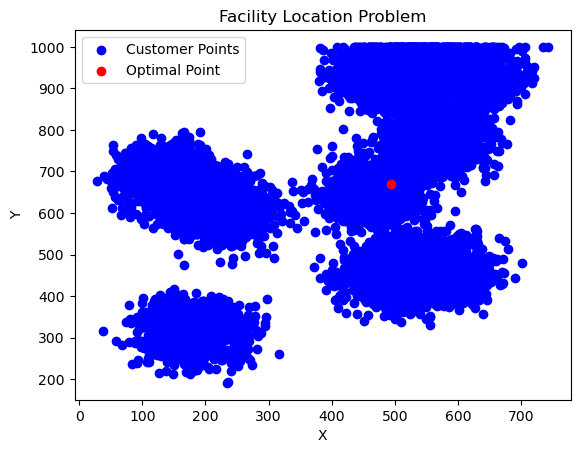

In [24]:
print("Case 1 Task 1 Map")
plot_map(case1_task1_factory_x,case1_task1_factory_y, data1["X"], data1["Y"])
print("Case 2 Task 1 Map")
plot_map(case2_task1_factory_x,case2_task1_factory_y, data2["X"], data2["Y"])
print("Case 3 Task 1 Map")
plot_map(case3_task1_factory_x,case3_task1_factory_y, data3["X"], data3["Y"])

print("Case 1 Task 2 Map")
plot_map(case1_task2_factory_x,case1_task2_factory_y, data1["X"], data1["Y"])
print("Case 2 Task 2 Map")
plot_map(case2_task2_factory_x,case2_task2_factory_y, data2["X"], data2["Y"])
print("Case 3 Task 2 Map")
plot_map(case3_task2_factory_x,case3_task2_factory_y, data3["X"], data3["Y"])

print("Case 1 Task 3 Map")
plot_map(case1_task3_factory_x,case1_task3_factory_y, data1["X"], data1["Y"])
print("Case 2 Task 3 Map")
plot_map(case2_task3_factory_x,case2_task3_factory_y, data2["X"], data2["Y"])
print("Case 3 Task 3 Map")
plot_map(case3_task3_factory_x,case3_task3_factory_y, data3["X"], data3["Y"])